# FIFA visulization and statistical analysis 

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
 
from math import pi
 

In [44]:
df = pd.read_csv('FIFA_1112.csv', index_col=0,  keep_default_na=False,  na_values='')
df.head()

,Name,Club,Country,Continent,League,Overall Rating,Position,Position Group,Skill,Weak Foot,Work Rate,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Height,Base Stats,In Game Stats
0,Lionel Messi,FC Barcelona,Argentina,SA,LaLiga Santander,94,RW,Attacker,4,4,M / L,87,92,92,96,39,66,170,472,2297
1,Cristiano Ronaldo,Piemonte Calcio,Portugal,EU,Serie A TIM,93,ST,Attacker,5,4,H / L,90,93,82,89,35,78,187,467,2265
2,Neymar Jr,Paris Saint-Germain,Brazil,SA,Ligue 1 Conforama,92,LW,Attacker,5,5,H / M,91,85,87,95,32,58,175,448,2197
3,Kevin De Bruyne,Manchester City,Belgium,EU,Premier League,91,CAM,Midfieder,4,5,H / H,76,86,92,87,61,78,181,480,2311
4,Eden Hazard,Real Madrid,Belgium,EU,LaLiga Santander,91,LW,Attacker,4,4,H / M,91,83,86,94,35,66,175,455,2191


# Participants  - England is the top one followed by Germany then Spain

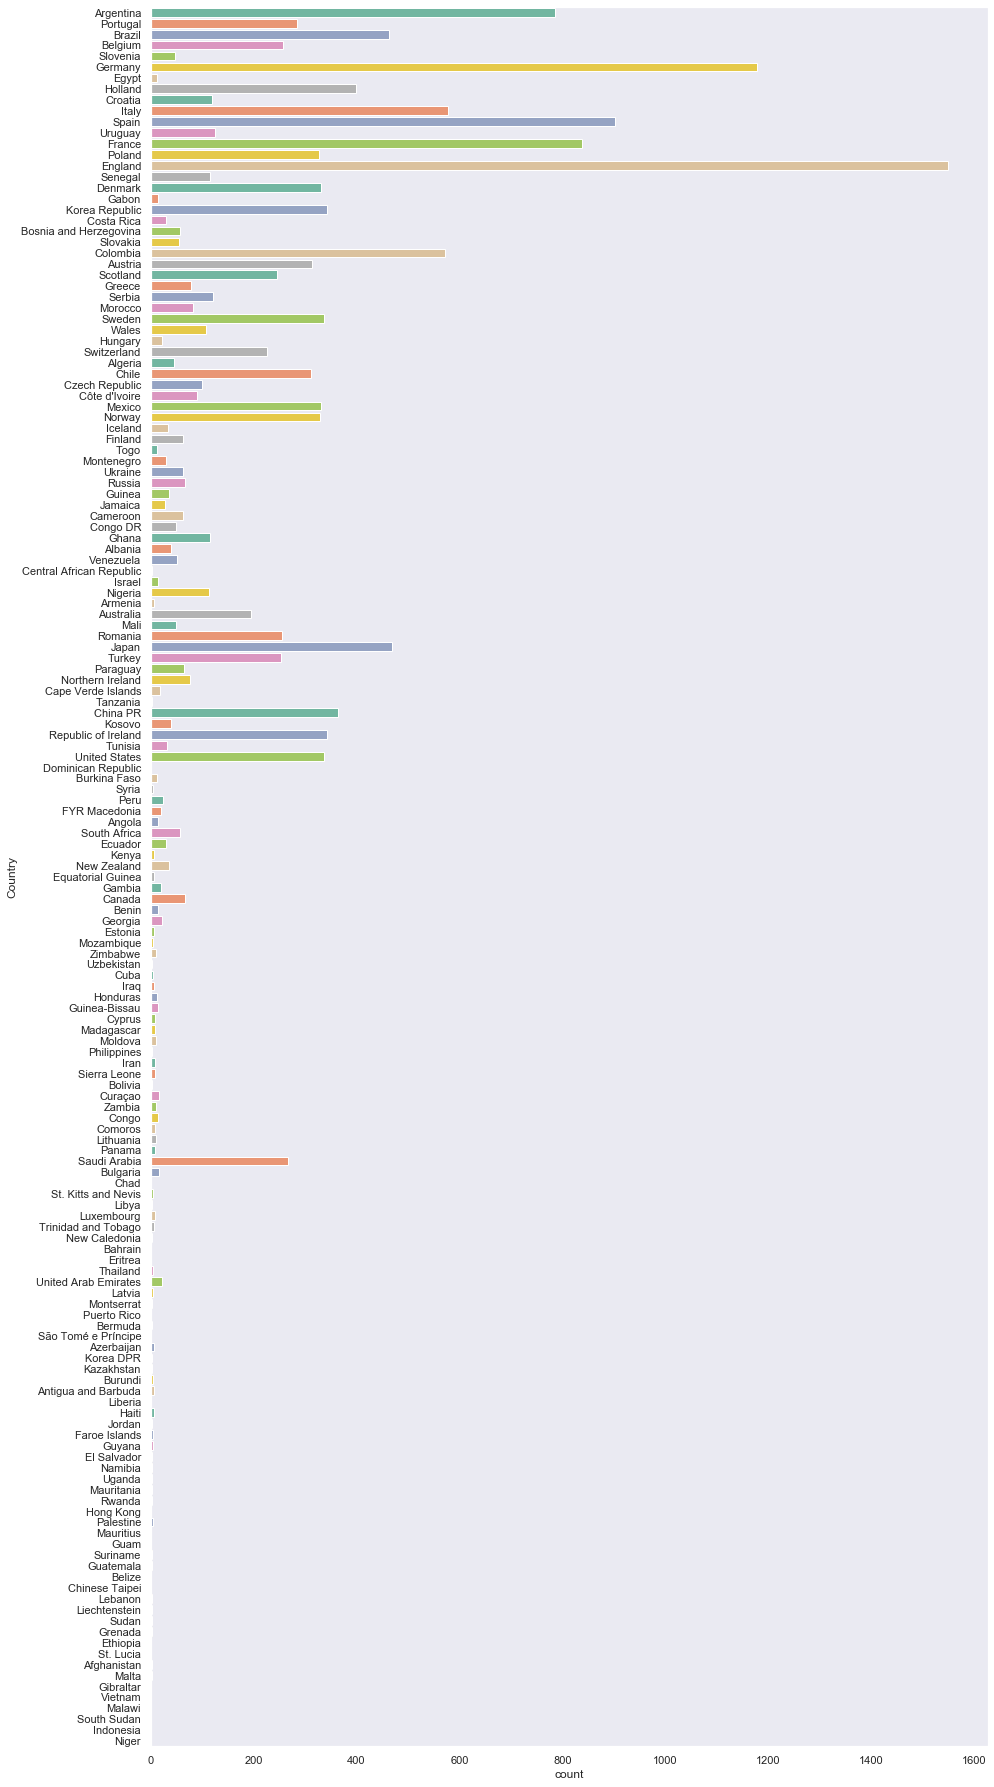

In [45]:
plt.figure(figsize=(15,32))
sns.countplot(y = df.Country,palette="Set2") #Plot all the nations on Y Axis

# Top three national participating- England, Germany and Spain

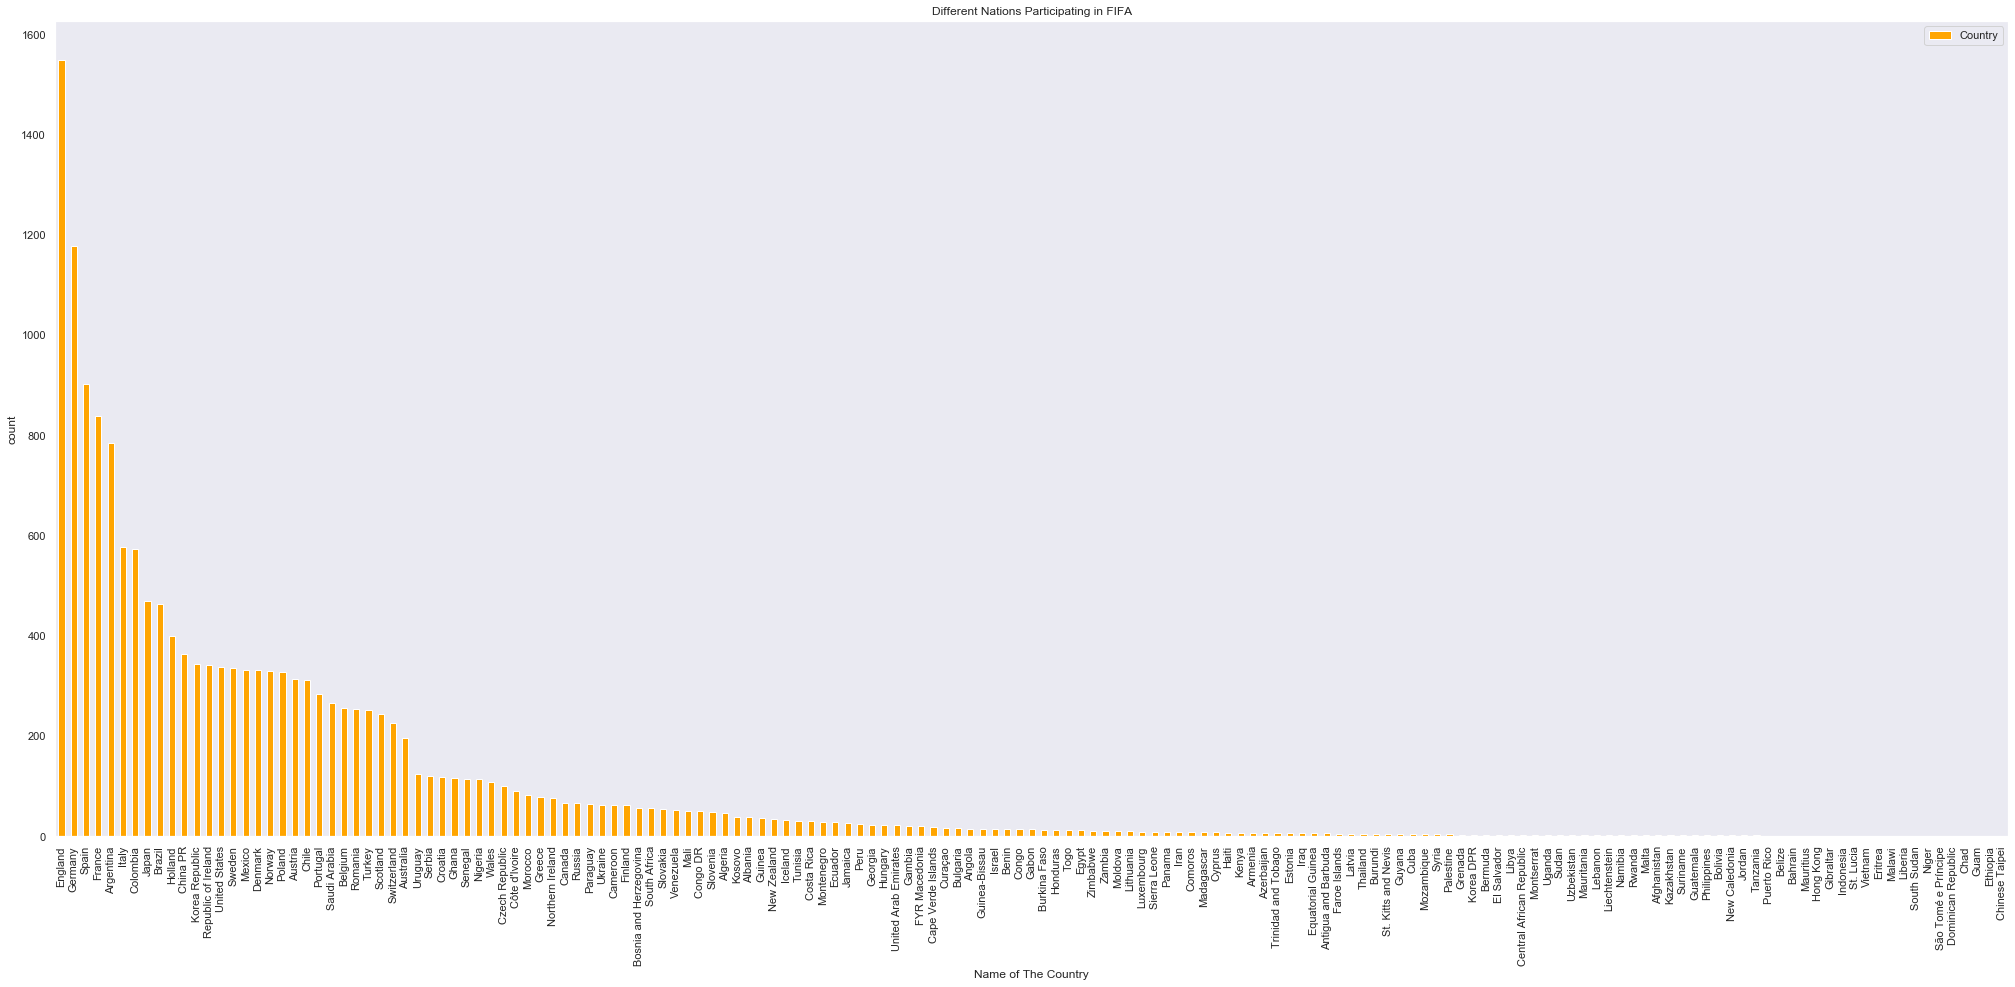

In [46]:
# To show Different nations participating in the FIFA 2019

df['Country'].value_counts().plot.bar(color = 'orange', figsize = (35, 15 ))
plt.title('Different Nations Participating in FIFA')
plt.xlabel('Name of The Country')
plt.ylabel('count')
plt.legend()
plt.show()

# Different position acquired by the players 

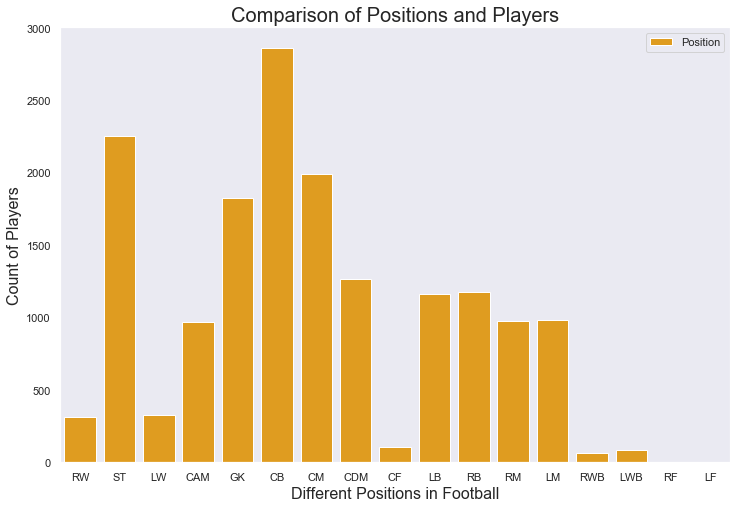

In [47]:
plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position', data = df, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.legend(labels=['Position'])
plt.show()

# Different position group acquired by the players 

No handles with labels found to put in legend.


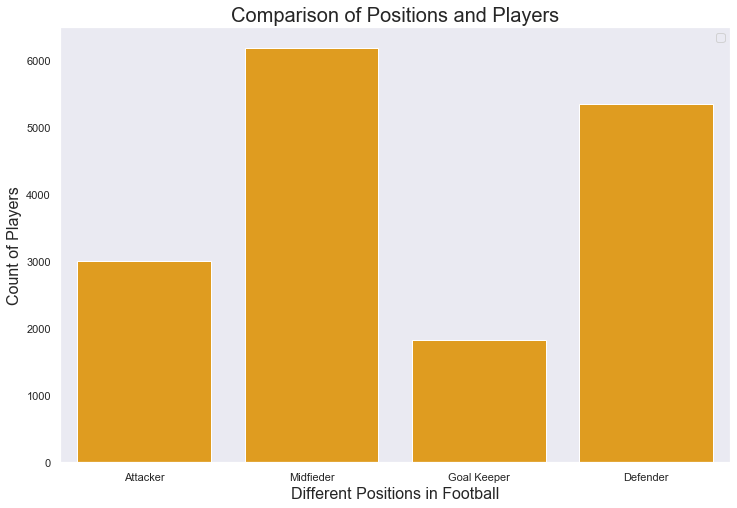

In [48]:
plt.figure(figsize = (12, 8))
sns.set(style = 'dark', palette = 'colorblind', color_codes = True)
ax = sns.countplot('Position Group', data = df, color = 'orange')
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
ax.legend()
plt.show()

# Players Height distribution -180cm 

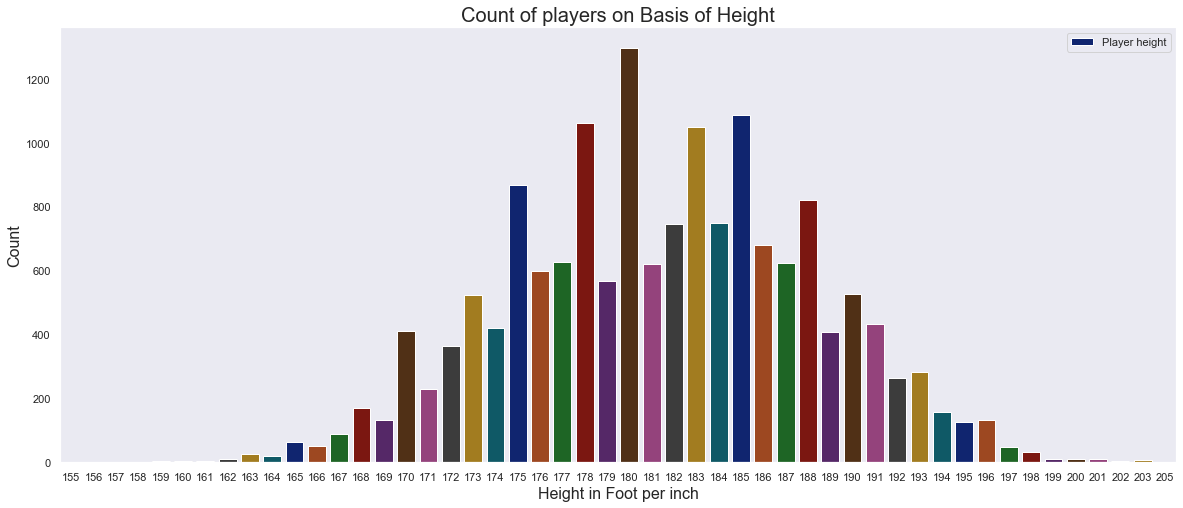

In [49]:
# Height of Players

plt.figure(figsize = (20, 8))
ax = sns.countplot(x = 'Height', data = df, palette = 'dark')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.legend(labels=['Player height'])
plt.show()

# Make correlation plot to see overall rating related to the features 

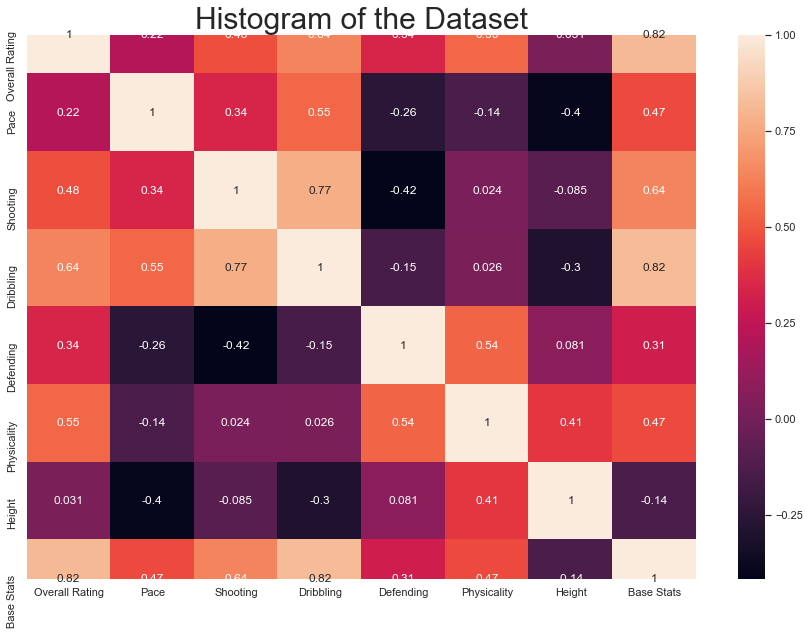

In [50]:
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(df[['Overall Rating', 'Pace', 'Shooting', 'Dribbling', 'Defending', 'Physicality',
                    'Height', 'Base Stats', 'In Game Stats']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 30)
plt.show()

# Best players per each position with their country, club based on the overall score - Here are players names

In [51]:
df.iloc[df.groupby(df['Position'])['Overall Rating'].idxmax()][['Position', 'Name', 'Club', 'Country']]

,Position,Name,Club,Country
3,CAM,Kevin De Bruyne,Manchester City,Belgium
8,CB,Virgil van Dijk,Liverpool,Holland
14,CDM,Sergio Busquets,FC Barcelona,Spain
22,CF,Antoine Griezmann,FC Barcelona,France
9,CM,Luka Modric,Real Madrid,Croatia
5,GK,Jan Oblak,Atlético Madrid,Slovenia
43,LB,Jordi Alba,FC Barcelona,Spain
559,ST,Loren,Real Betis,Spain
129,CB,Lucas Hernández,FC Bayern München,France
2,LW,Neymar Jr,Paris Saint-Germain,Brazil


# Best players per each position group with their country, club based on the overall score - Here are player's names 

In [52]:
df.iloc[df.groupby(df['Position Group'])['Overall Rating'].idxmax()][['Position Group', 'Name', 'Club', 'Country']]

,Position Group,Name,Club,Country
0,Attacker,Lionel Messi,FC Barcelona,Argentina
8,Defender,Virgil van Dijk,Liverpool,Holland
5,Goal Keeper,Jan Oblak,Atlético Madrid,Slovenia
3,Midfieder,Kevin De Bruyne,Manchester City,Belgium


# Top 10 Countries based on participants and compare their overal scores - which country has the highest overall rating? --- Spain

In [53]:
# Top 10 countries with highest number of players to compare their overall scores

df['Country'].value_counts().head(10)

England      1549
Germany      1178
Spain         902
France        838
Argentina     785
Italy         577
Colombia      573
Japan         470
Brazil        464
Holland       399
Name: Country, dtype: int64

# Lets check Overall Rating of TOP 10 participant countries 

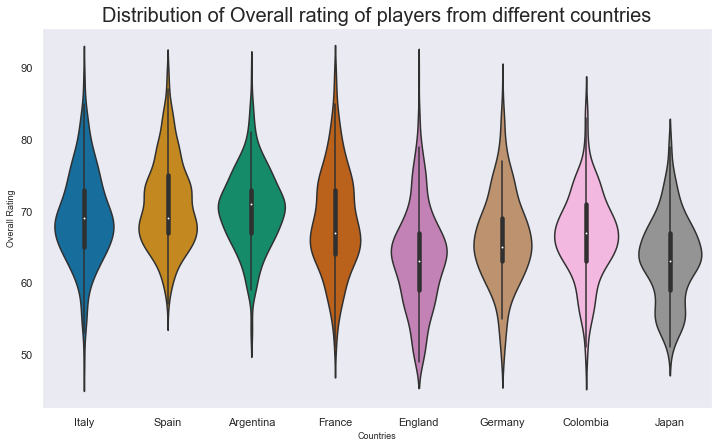

In [54]:
# Every Nations' Player and their Weights

some_countries = ('England', 'Germany', 'Spain', 'France', 'Argentina', 'Italy', 'Colombia', 'Japan')
df_countries = df.loc[df['Country'].isin(some_countries) & df['Overall Rating']]

plt.rcParams['figure.figsize'] = (12, 7)
ax = sns.violinplot(x = df_countries['Country'], y = df_countries['Overall Rating'], palette = 'colorblind')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Rating', fontsize = 9)
ax.set_title(label = 'Distribution of Overall rating of players from different countries', fontsize = 20)
plt.show()

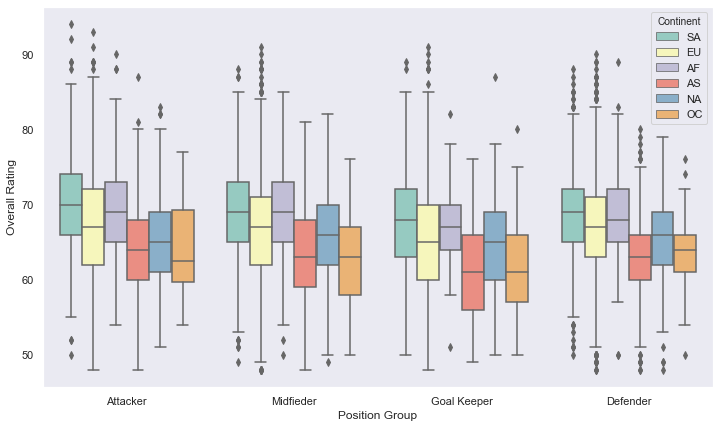

In [55]:
ax = sns.boxplot(x="Position Group", y="Overall Rating", hue="Continent",
...                  data=df, palette="Set3")

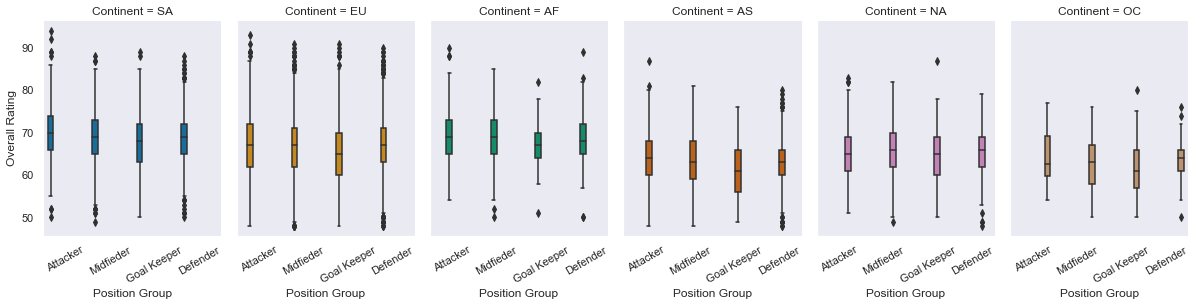

In [56]:
 g = sns.catplot(x="Position Group", y="Overall Rating",
...                 hue="Continent", col="Continent",
...                 data=df, kind="box",
...                 height=4, aspect=.7);
g.set_xticklabels(rotation=30)

In [57]:
#Data sanity check- Need to do continent conversion 
df.isnull().sum()

Name              0
Club              0
Country           0
Continent         0
League            0
Overall Rating    0
Position          0
Position Group    0
Skill             0
Weak Foot         0
Work Rate         0
Pace              0
Shooting          0
Passing           0
Dribbling         0
Defending         0
Physicality       0
Height            0
Base Stats        0
In Game Stats     0
dtype: int64

# This is statistical summary of correlation matrix 

In [58]:
#Compute pairwise correlation of Dataframe's attributes
corr = df.corr()
corr

,Overall Rating,Skill,Weak Foot,Pace,Shooting,Passing,Dribbling,Defending,Physicality,Height,Base Stats
Overall Rating,1.000000,0.405312,0.226443,0.218250,0.478652,0.663701,0.638747,0.341885,0.547524,0.031415,0.816338
Skill,0.405312,1.000000,0.340601,0.356204,0.314743,0.373358,0.459417,0.011243,-0.028350,-0.440749,0.411692
Weak Foot,0.226443,0.340601,1.000000,0.157204,0.225317,0.224419,0.250463,-0.019498,0.023892,-0.179283,0.236855
Pace,0.218250,0.356204,0.157204,1.000000,0.344672,0.294732,0.547633,-0.256435,-0.136198,-0.396187,0.468673
Shooting,0.478652,0.314743,0.225317,0.344672,1.000000,0.669392,0.773640,-0.416687,0.024065,-0.085149,0.635359
Passing,0.663701,0.373358,0.224419,0.294732,0.669392,1.000000,0.834255,0.118976,0.150034,-0.202545,0.851937
Dribbling,0.638747,0.459417,0.250463,0.547633,0.773640,0.834255,1.000000,-0.146342,0.026148,-0.299866,0.820249
Defending,0.341885,0.011243,-0.019498,-0.256435,-0.416687,0.118976,-0.146342,1.000000,0.535492,0.080802,0.310364
Physicality,0.547524,-0.028350,0.023892,-0.136198,0.024065,0.150034,0.026148,0.535492,1.000000,0.406097,0.466993
Height,0.031415,-0.440749,-0.179283,-0.396187,-0.085149,-0.202545,-0.299866,0.080802,0.406097,1.000000,-0.135300


# Use heatmap to check correlation strength 

Text(0.5, 0.98, 'Overall Rating Correlation Heatmap')

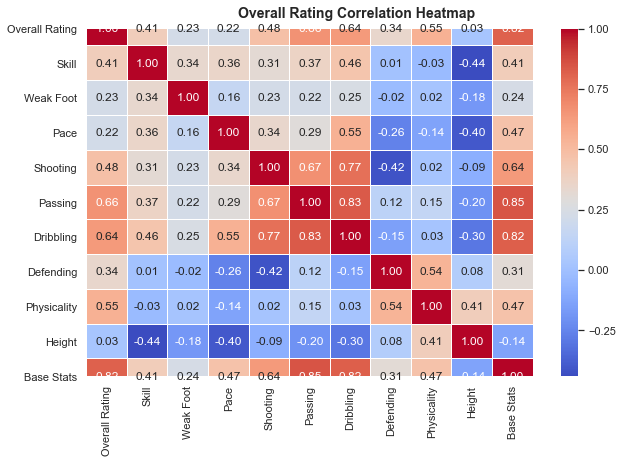

In [59]:
#Compute pairwise correlation of Dataframe's attributes based on position group
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Overall Rating Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

# Correlation based on position group = goal keeper

In [60]:
ColumnNames = list(df.columns.values)
df_goa= df[df['Position Group'] == 'Goal Keeper']
C_Data_goa = pd.concat([df_goa[['Position Group','Overall Rating']],df_goa[ColumnNames[11:17]]],axis=1)
#Compute pairwise correlation of Dataframe's attributes
corr_goa = C_Data_goa.corr()
corr_goa

,Overall Rating,Pace,Shooting,Passing,Dribbling,Defending,Physicality
Overall Rating,1.000000,0.952177,0.930710,0.791501,0.950648,0.480734,0.947644
Pace,0.952177,1.000000,0.852293,0.735769,0.922608,0.457676,0.862819
Shooting,0.930710,0.852293,1.000000,0.743100,0.842242,0.405183,0.883794
Passing,0.791501,0.735769,0.743100,1.000000,0.724899,0.394096,0.737465
Dribbling,0.950648,0.922608,0.842242,0.724899,1.000000,0.457154,0.863580
Defending,0.480734,0.457676,0.405183,0.394096,0.457154,1.000000,0.447255
Physicality,0.947644,0.862819,0.883794,0.737465,0.863580,0.447255,1.000000


Text(0.5, 0.98, 'Overall Rating Correlation Heatmap for Goal Keeper')

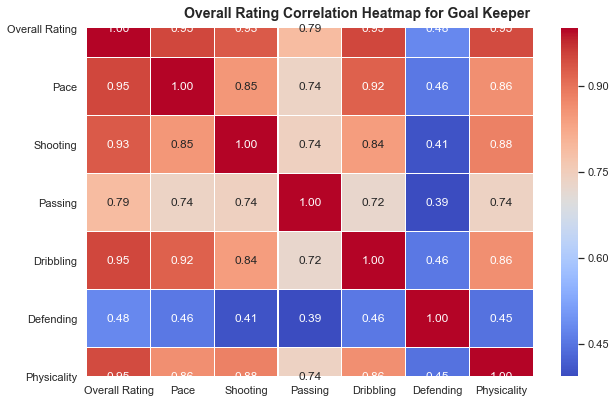

In [61]:
#Compute pairwise correlation of Dataframe's attributes based on position group
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr_goa, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Overall Rating Correlation Heatmap for Goal Keeper', 
              fontsize=14, 
              fontweight='bold')

# Correlation based on position group = Midfieder

In [62]:
df_mid= df[df['Position Group'] == 'Midfieder']
C_Data_mid = pd.concat([df_mid[['Position Group','Overall Rating']],df_mid[ColumnNames[11:17]]],axis=1)
#Compute pairwise correlation of Dataframe's attributes
corr_mid = C_Data_mid.corr()
corr_mid

,Overall Rating,Pace,Shooting,Passing,Dribbling,Defending,Physicality
Overall Rating,1.000000,0.147507,0.745397,0.886987,0.854539,0.395478,0.472901
Pace,0.147507,1.000000,0.274509,0.016949,0.386851,-0.437061,-0.199848
Shooting,0.745397,0.274509,1.000000,0.744190,0.779898,0.016670,0.207699
Passing,0.886987,0.016949,0.744190,1.000000,0.807459,0.377595,0.341463
Dribbling,0.854539,0.386851,0.779898,0.807459,1.000000,0.069243,0.140097
Defending,0.395478,-0.437061,0.016670,0.377595,0.069243,1.000000,0.686734
Physicality,0.472901,-0.199848,0.207699,0.341463,0.140097,0.686734,1.000000


Text(0.5, 0.98, 'Overall Rating Correlation Heatmap for Midfieder')

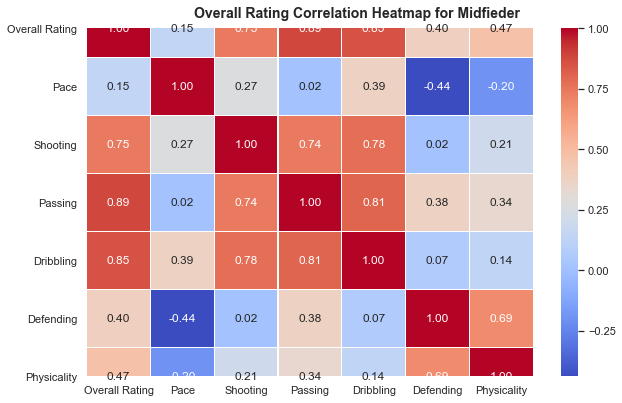

In [63]:
#Compute pairwise correlation of Dataframe's attributes based on position group
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr_mid, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Overall Rating Correlation Heatmap for Midfieder', 
              fontsize=14, 
              fontweight='bold')

# Correlation based on position group = Defender

In [64]:
df_def= df[df['Position Group'] == 'Defender']
C_Data_def = pd.concat([df_def[['Position Group','Overall Rating']],df_def[ColumnNames[11:17]]],axis=1)
#Compute pairwise correlation of Dataframe's attributes
corr_def = C_Data_def.corr()
corr_def

,Overall Rating,Pace,Shooting,Passing,Dribbling,Defending,Physicality
Overall Rating,1.000000,0.089944,0.483424,0.634127,0.534119,0.946925,0.653989
Pace,0.089944,1.000000,0.343027,0.427200,0.606085,-0.090624,-0.148605
Shooting,0.483424,0.343027,1.000000,0.785550,0.708577,0.337472,0.219883
Passing,0.634127,0.427200,0.785550,1.000000,0.870753,0.477479,0.244195
Dribbling,0.534119,0.606085,0.708577,0.870753,1.000000,0.364595,0.095481
Defending,0.946925,-0.090624,0.337472,0.477479,0.364595,1.000000,0.616140
Physicality,0.653989,-0.148605,0.219883,0.244195,0.095481,0.616140,1.000000


Text(0.5, 0.98, 'Overall Rating Correlation Heatmap for Goal Keeper')

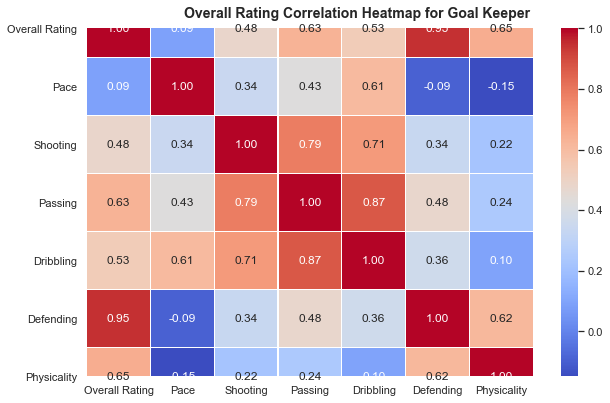

In [65]:
#Compute pairwise correlation of Dataframe's attributes based on position group
fig, (ax) = plt.subplots(1, 1, figsize=(10,6))

hm = sns.heatmap(corr_def, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('Overall Rating Correlation Heatmap for Goal Keeper', 
              fontsize=14, 
              fontweight='bold')

# Correlation based on position group  = Midfieder, Goal Keeper, Defender, Attacker

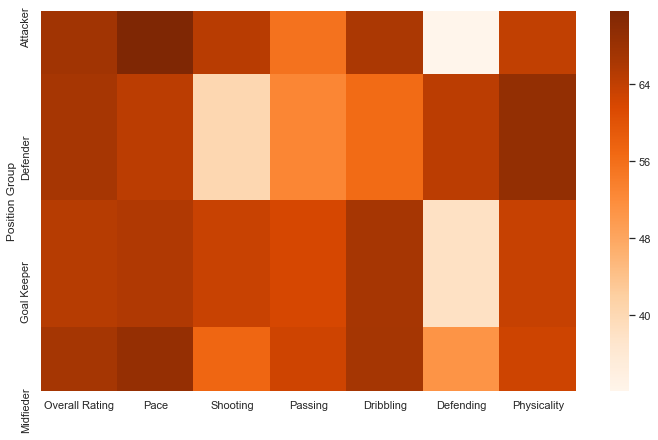

In [66]:
ColumnNames = list(df.columns.values)
C_Data = pd.concat([df[['Position Group','Overall Rating']],df[ColumnNames[11:17]]],axis=1)
HeatmapData = C_Data.groupby('Position Group').mean()
sns.heatmap(HeatmapData,cmap='Oranges',xticklabels = True,yticklabels = True)

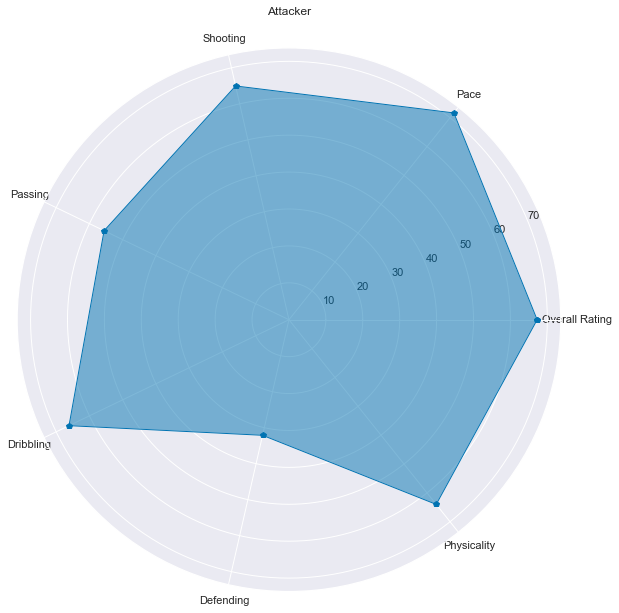

In [67]:
labels = np.array(HeatmapData.columns.values)
N = len(labels)

Position = 'Attacker'
stats=HeatmapData.loc[Position,labels]

angles = [n / float(N) * 2 * pi for n in range(N)]

stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))


fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'p-', linewidth=1)
ax.fill(angles, stats, alpha=0.5)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(Position)
ax.grid(True)

# Midfieder correlation strength to each feature 

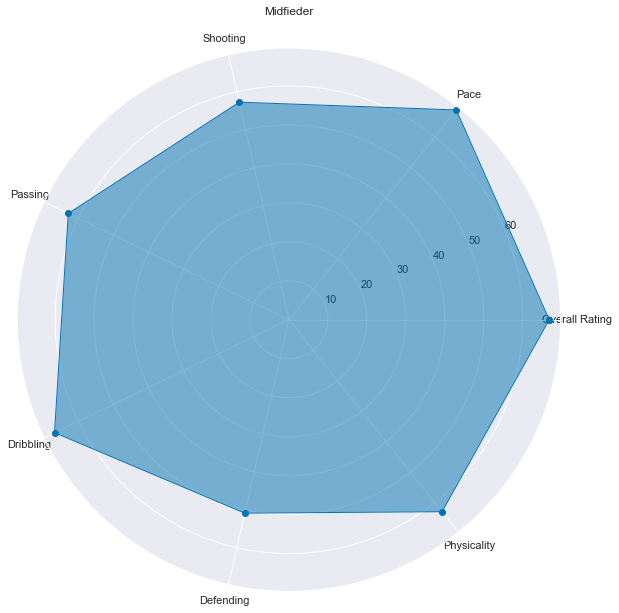

In [68]:
labels = np.array(HeatmapData.columns.values)
N = len(labels)

Position = 'Midfieder'
stats=HeatmapData.loc[Position,labels]

angles = [n / float(N) * 2 * pi for n in range(N)]

stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))


fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=1)
ax.fill(angles, stats, alpha=0.5)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(Position)
ax.grid(True)

# Goal Keeper  correlation strength to each feature 

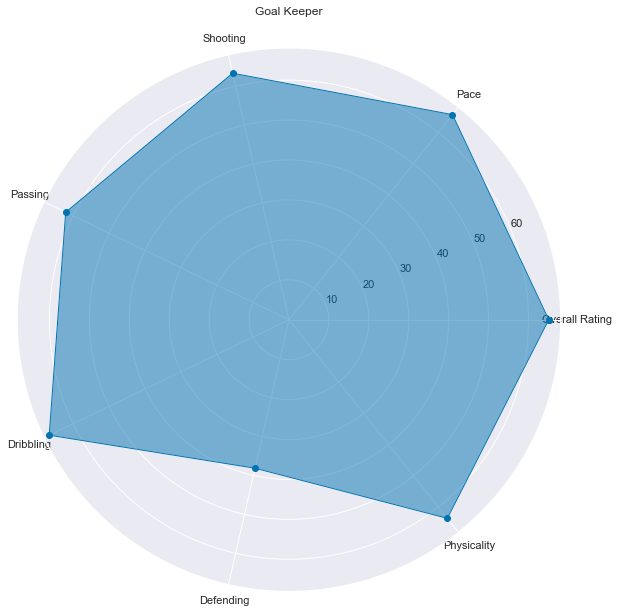

In [69]:
labels = np.array(HeatmapData.columns.values)
N = len(labels)

Position = 'Goal Keeper'
stats=HeatmapData.loc[Position,labels]

angles = [n / float(N) * 2 * pi for n in range(N)]

stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))


fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=1)
ax.fill(angles, stats, alpha=0.5)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(Position)
ax.grid(True)

# Defender correlation strength to each feature 

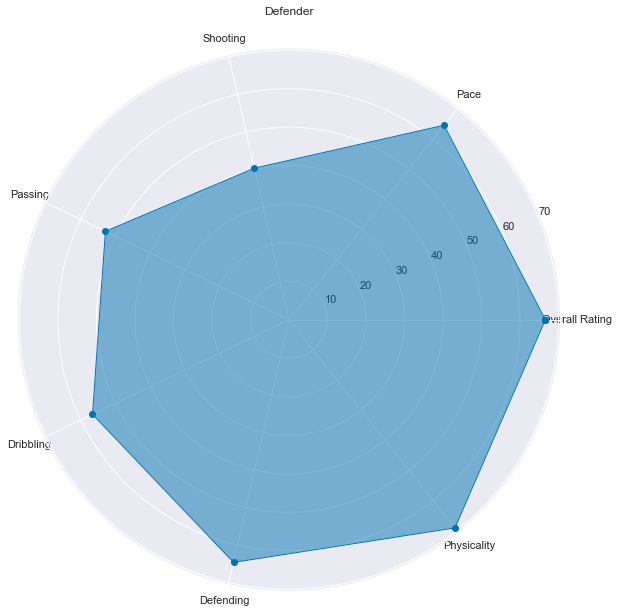

In [70]:
labels = np.array(HeatmapData.columns.values)
N = len(labels)

Position = 'Defender'
stats=HeatmapData.loc[Position,labels]

angles = [n / float(N) * 2 * pi for n in range(N)]

stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))


fig=plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=1)
ax.fill(angles, stats, alpha=0.5)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.set_title(Position)
ax.grid(True)

# pair plot to see all correlations 

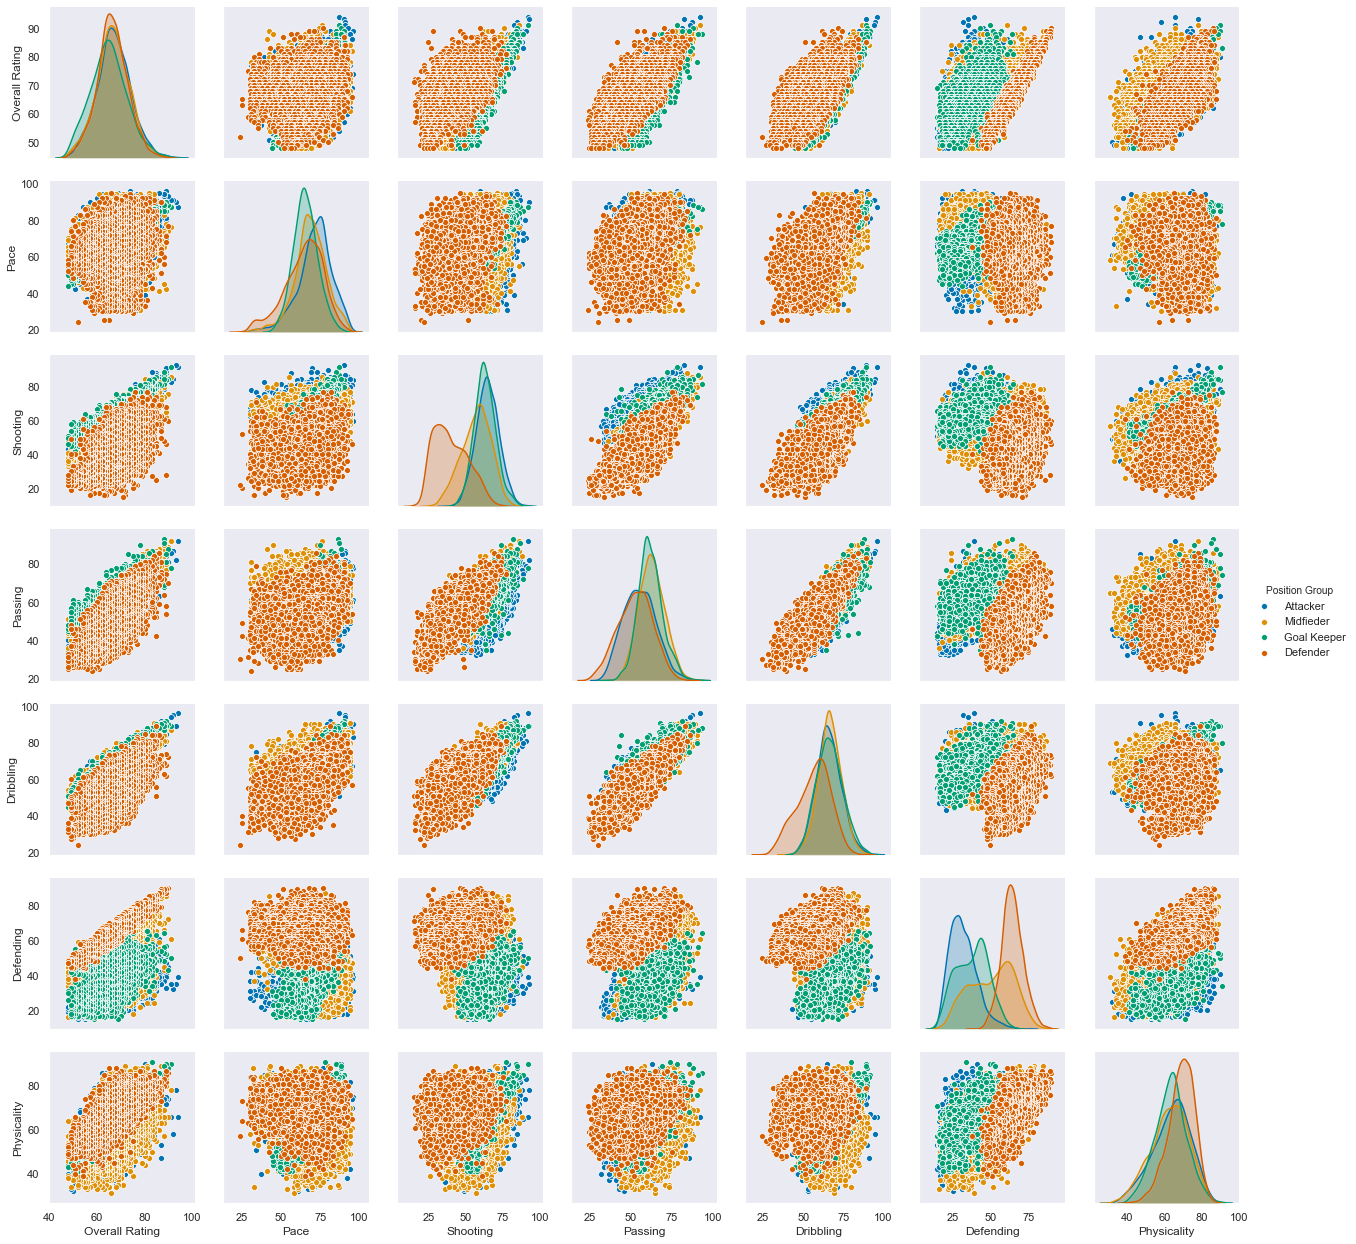

In [71]:
g = sns.pairplot(C_Data, hue="Position Group")

# Players top 4 features based on position
For example CAM: pace, dribbling, passing, Shooting

In [72]:
# defining the features of players

player_features = ('Pace', 'Shooting', 'Passing', 
                   'Dribbling', 'Defending',  
                    'Physicality', 
)

# Top five features for every position in football

for i, val in df.groupby(df['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position CAM: Pace, Dribbling, Passing, Shooting
Position CB: Physicality, Defending, Pace, Dribbling
Position CDM: Physicality, Defending, Dribbling, Passing
Position CF: Pace, Dribbling, Shooting, Passing
Position CM: Dribbling, Pace, Physicality, Passing
Position GK: Dribbling, Pace, Physicality, Shooting
Position LB: Pace, Physicality, Dribbling, Defending
Position LF: Dribbling, Pace, Shooting, Physicality
Position LM: Pace, Dribbling, Passing, Shooting
Position LW: Pace, Dribbling, Shooting, Passing
Position LWB: Pace, Physicality, Dribbling, Defending
Position RB: Pace, Physicality, Dribbling, Defending
Position RF: Pace, Dribbling, Shooting, Passing
Position RM: Pace, Dribbling, Passing, Shooting
Position RW: Pace, Dribbling, Shooting, Passing
Position RWB: Pace, Physicality, Dribbling, Defending
Position ST: Pace, Physicality, Shooting, Dribbling


# Position group top 4 features
Attacker - pace, dribbling, shooting, nad physicality

In [73]:
# defining the features of players

player_features = ('Pace', 'Shooting', 'Passing', 
                   'Dribbling', 'Defending', 'Physicality', 
)

# Top five features for every position in football

for i, val in df.groupby(df['Position Group'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}, {}'.format(i, *tuple(val.nlargest(4).index)))

Position Attacker: Pace, Dribbling, Shooting, Physicality
Position Defender: Physicality, Defending, Pace, Dribbling
Position Goal Keeper: Dribbling, Pace, Physicality, Shooting
Position Midfieder: Pace, Dribbling, Physicality, Passing


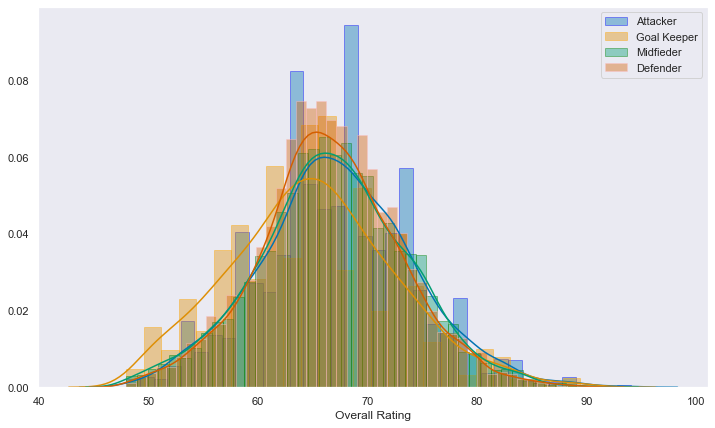

In [75]:
sample=df
f_fuko = sample.loc[sample['Position Group']=='Attacker']['Overall Rating']
m_fuko = sample.loc[sample['Position Group']=='Goal Keeper']['Overall Rating']
f1_fuko = sample.loc[sample['Position Group']=='Midfieder']['Overall Rating']
m1_fuko = sample.loc[sample['Position Group']=='Defender']['Overall Rating']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'blue'}, label='Attacker')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'orange'}, label='Goal Keeper')
sns.distplot(f1_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'green'}, label='Midfieder')
sns.distplot(m1_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'pink'}, label='Defender')
plt.legend()

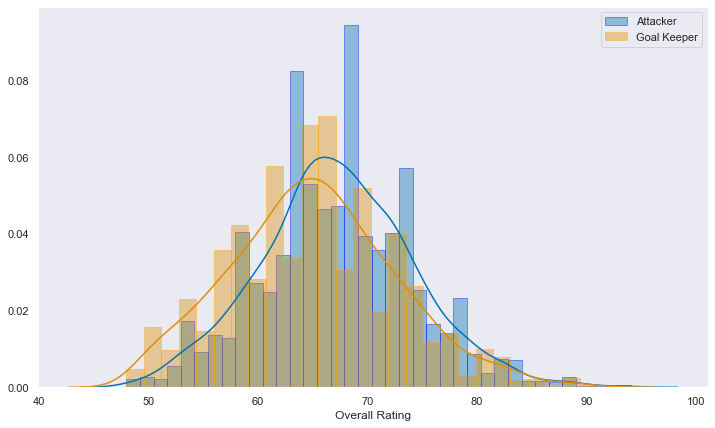

In [76]:
f_fuko = sample.loc[sample['Position Group']=='Attacker']['Overall Rating']
m_fuko = sample.loc[sample['Position Group']=='Goal Keeper']['Overall Rating']
# f1_fuko = sample.loc[sample['Position Group']=='Midfieder']['Overall Rating']
# m1_fuko = sample.loc[sample['Position Group']=='Defender']['Overall Rating']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'blue'}, label='Attacker')
sns.distplot(m_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'orange'}, label='Goal Keeper')
# sns.distplot(f1_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'green'}, label='Midfieder')
# sns.distplot(m1_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'pink'}, label='Defender')
plt.legend()